In [67]:
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [68]:
# Reading the Design Matrix - N x D + y
filetype='_3_withpos'
data = sio.loadmat("./Dataset/original_data" + filetype +".mat")["training_matrix"]

# Feature Matrix - N x 24
X = data[:, :-1]

# Targets - N x 1
y = data[:, -1][:, np.newaxis]

# Normalization
mu = X.mean(axis=0)
sigma = X.std(axis=0)

# Normalized Dataset
X_norm = (X - mu) / sigma

X_norm.shape, y.shape, mu, sigma

((26871, 18),
 (26871, 1),
 array([ 1.84585827e+00,  1.84671513e+00,  1.84761807e+00,  1.84844338e+00,
        -5.01038567e-04, -5.94611942e-04, -6.54332642e-04, -7.26666017e-04,
        -1.08912060e-02, -1.09482035e-02, -1.09776275e-02, -1.10313734e-02,
         3.93584959e+00,  3.93592051e+00,  3.93598962e+00, -6.11364639e-01,
        -6.11193833e-01, -6.11026788e-01]),
 array([1.68275469, 1.67926107, 1.67543387, 1.67166875, 0.33295965,
        0.33276738, 0.33260605, 0.33251804, 0.18985753, 0.18979498,
        0.18972114, 0.18962583, 2.20224022, 2.20217147, 2.20210617,
        2.21325941, 2.21301375, 2.21277379]))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((19346, 18), (2150, 18), (5375, 18), (19346, 1), (2150, 1), (5375, 1))

In [70]:
train_data = np.concatenate((X_train, y_train), axis=1)
val_data = np.concatenate((X_val, y_val), axis=1)
test_data = np.concatenate((X_test, y_test), axis=1)

train_data.shape, val_data.shape, test_data.shape

((19346, 19), (2150, 19), (5375, 19))

In [71]:
np.save("./Dataset/train_data" + filetype + ".npy", train_data.astype(np.float32))
np.save("./Dataset/val_data" + filetype + ".npy", val_data.astype(np.float32))
np.save("./Dataset/test_data" + filetype + ".npy", test_data.astype(np.float32))

In [72]:
X_norm[0], y[0]

(array([-1.09692653, -1.0997189 , -1.10276992, -1.1057474 , -0.09243878,
        -0.11074749, -0.12110687, -0.12929152, -0.50917426, -0.5027649 ,
        -0.51625497, -0.4789833 ,  0.55554177,  0.55552192,  0.55551014,
        -0.99825317, -0.99845232, -0.99862853]),
 array([-0.00079261]))

In [73]:
data[0]

array([ 0.00000000e+000,  4.50813698e-183, -1.04241146e-183,
       -3.21553395e-180, -3.12794213e-002, -3.74477627e-002,
       -4.09352111e-002, -4.37184301e-002, -1.07561772e-001,
       -1.06370456e-001, -1.08922111e-001, -1.01858977e-001,
        5.15928602e+000,  5.15927503e+000,  5.15928192e+000,
       -2.82075787e+000, -2.82078255e+000, -2.82076583e+000,
       -7.92613226e-004])

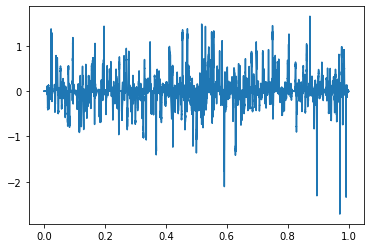

In [74]:
t = np.linspace(0, 1, X.shape[0])
plt.plot(t, y)
plt.show()